# 데이터 불러오기 / 패킷 정리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1=pd.read_csv('df4.csv')
df2=pd.read_csv('df3.csv', sep=';')
df3=pd.read_csv('df5.csv')

In [2]:
df_ff=df1[df1['Sensor ID']=='ff']

packet_datafield_event=[]
packet_datafield_g=[]
for i in df_ff[df_ff['CMD']=='80'].index:
    if bytes.fromhex(df_ff[df_ff['CMD']=='80']['Data'][i]).decode("ascii")[1]=='E':
        packet_datafield_event.append(bytes.fromhex(df_ff[df_ff['CMD']=='80']['Data'][i]).decode("ascii"))
    else:
        packet_datafield_g.append(bytes.fromhex(df_ff[df_ff['CMD']=='80']['Data'][i]).decode("ascii"))

bio=[]
temp=[]
hum=[]
for i in range(len(packet_datafield_event)):
    packet_datafield_event[i]=packet_datafield_event[i][19::][0:-26]
    if packet_datafield_event[i][11:24]=='Recv Bio Data':
        bio.append(packet_datafield_event[i])
    elif packet_datafield_event[i][11:17]=='Read T':
        temp.append(packet_datafield_event[i])
    elif packet_datafield_event[i][11:17]=='Read H':
        hum.append(packet_datafield_event[i])

df_bio=pd.DataFrame([bio[i].split(' ') for i in range(len(bio))])
df_temp=pd.DataFrame([temp[i].split(' ') for i in range(len(temp))])
df_hum=pd.DataFrame([hum[i].split(' ') for i in range(len(hum))])

df_bio['Sensor']=df_bio[1]+' '+ df_bio[2]+' '+df_bio[3]
df_bio.drop(columns=[1, 2, 3], inplace=True)
df_bio.columns=['Time', 'PD', 'ACT', 'BR', 'HR', 'X', 'Y', 'Sensor']

df_temp['Sensor']=df_temp[1]+' '+ df_temp[2]+' '+df_temp[3]
df_temp.drop(columns=[1, 2, 3], inplace=True)
df_temp.columns=['Time', 'Temp', 'Sensor']

df_hum['Sensor']=df_hum[1]+' '+ df_hum[2]+' '+df_hum[3]
df_hum.drop(columns=[1, 2, 3], inplace=True)
df_hum.columns=['Time', 'Hum', 'Sensor']

for i in df_bio.columns[1:7]:
    df_bio[i]=df_bio[i].str.extract(r'(\d+)')
df_bio['Time'] = df_bio['Time'].str.strip('[]')
    
df_temp['Temp']=df_temp['Temp'].str.extract(r'(\d+.\d)')
df_temp['Time'] = df_temp['Time'].str.strip('[]')

df_hum['Hum']=df_hum['Hum'].str.extract(r'(\d+.\d)')
df_hum['Time'] = df_hum['Time'].str.strip('[]')
    
df_bio[['PD', 'ACT', 'BR', 'HR', 'X', 'Y']]=df_bio[['PD', 'ACT', 'BR', 'HR', 'X', 'Y']].apply(pd.to_numeric)
df_temp['Temp']=pd.to_numeric(df_temp['Temp'])
df_hum['Hum']=pd.to_numeric(df_hum['Hum'])

df_bio2=df_bio.copy()
df_temp2=df_temp.copy()
df_hum2=df_hum.copy()

In [3]:
df_ff=df2[df2['Sensor ID']=='ff']

packet_datafield_event=[]
packet_datafield_g=[]
for i in df_ff[df_ff['CMD']==80].index:
    if bytes.fromhex(df_ff[df_ff['CMD']==80]['Data'][i]).decode("ascii")[1]=='E':
        packet_datafield_event.append(bytes.fromhex(df_ff[df_ff['CMD']==80]['Data'][i]).decode("ascii"))
    else:
        packet_datafield_g.append(bytes.fromhex(df_ff[df_ff['CMD']==80]['Data'][i]).decode("ascii"))

bio=[]
temp=[]
hum=[]
for i in range(len(packet_datafield_event)):
    packet_datafield_event[i]=packet_datafield_event[i][19::][0:-26]
    if packet_datafield_event[i][11:24]=='Recv Bio Data':
        bio.append(packet_datafield_event[i])
    elif packet_datafield_event[i][11:17]=='Read T':
        temp.append(packet_datafield_event[i])
    elif packet_datafield_event[i][11:17]=='Read H':
        hum.append(packet_datafield_event[i])

df_bio=pd.DataFrame([bio[i].split(' ') for i in range(len(bio))])
df_temp=pd.DataFrame([temp[i].split(' ') for i in range(len(temp))])
df_hum=pd.DataFrame([hum[i].split(' ') for i in range(len(hum))])

df_bio['Sensor']=df_bio[1]+' '+ df_bio[2]+' '+df_bio[3]
df_bio.drop(columns=[1, 2, 3], inplace=True)
df_bio.columns=['Time', 'PD', 'ACT', 'BR', 'HR', 'X', 'Y', 'Sensor']

df_temp['Sensor']=df_temp[1]+' '+ df_temp[2]+' '+df_temp[3]
df_temp.drop(columns=[1, 2, 3], inplace=True)
df_temp.columns=['Time', 'Temp', 'Sensor']

df_hum['Sensor']=df_hum[1]+' '+ df_hum[2]+' '+df_hum[3]
df_hum.drop(columns=[1, 2, 3], inplace=True)
df_hum.columns=['Time', 'Hum', 'Sensor']

for i in df_bio.columns[1:7]:
    df_bio[i]=df_bio[i].str.extract(r'(\d+)')
df_bio['Time'] = df_bio['Time'].str.strip('[]')
    
df_temp['Temp']=df_temp['Temp'].str.extract(r'(\d+.\d)')
df_temp['Time'] = df_temp['Time'].str.strip('[]')

df_hum['Hum']=df_hum['Hum'].str.extract(r'(\d+.\d)')
df_hum['Time'] = df_hum['Time'].str.strip('[]')
    
df_bio[['PD', 'ACT', 'BR', 'HR', 'X', 'Y']]=df_bio[['PD', 'ACT', 'BR', 'HR', 'X', 'Y']].apply(pd.to_numeric)
df_temp['Temp']=pd.to_numeric(df_temp['Temp'])
df_hum['Hum']=pd.to_numeric(df_hum['Hum'])

df_bio3=df_bio.copy()
df_temp3=df_temp.copy()
df_hum3=df_hum.copy()

In [4]:
df3=pd.read_csv('df5.csv')
df3=df3.iloc[len(df1):]
df3.index=list(range(0, len(df3)))
df_ff=df3[df3['Sensor ID']=='ff']

packet_datafield_event=[]
packet_datafield_g=[]
for i in df_ff[df_ff['CMD']=='80'].index:
    if bytes.fromhex(df_ff[df_ff['CMD']=='80']['Data'][i]).decode("ascii")[1]=='E':
        packet_datafield_event.append(bytes.fromhex(df_ff[df_ff['CMD']=='80']['Data'][i]).decode("ascii"))
    else:
        packet_datafield_g.append(bytes.fromhex(df_ff[df_ff['CMD']=='80']['Data'][i]).decode("ascii"))

bio=[]
temp=[]
hum=[]
for i in range(len(packet_datafield_event)):
    packet_datafield_event[i]=packet_datafield_event[i][19::][0:-26]
    if packet_datafield_event[i][11:24]=='Recv Bio Data':
        bio.append(packet_datafield_event[i])
    elif packet_datafield_event[i][11:17]=='Read T':
        temp.append(packet_datafield_event[i])
    elif packet_datafield_event[i][11:17]=='Read H':
        hum.append(packet_datafield_event[i])

df_bio=pd.DataFrame([bio[i].split(' ') for i in range(len(bio))])
df_temp=pd.DataFrame([temp[i].split(' ') for i in range(len(temp))])
df_hum=pd.DataFrame([hum[i].split(' ') for i in range(len(hum))])

df_bio['Sensor']=df_bio[1]+' '+ df_bio[2]+' '+df_bio[3]
df_bio.drop(columns=[1, 2, 3], inplace=True)
df_bio.columns=['Time', 'PD', 'ACT', 'BR', 'HR', 'X', 'Y', 'Sensor']

df_temp['Sensor']=df_temp[1]+' '+ df_temp[2]+' '+df_temp[3]
df_temp.drop(columns=[1, 2, 3], inplace=True)
df_temp.columns=['Time', 'Temp', 'Sensor']

df_hum['Sensor']=df_hum[1]+' '+ df_hum[2]+' '+df_hum[3]
df_hum.drop(columns=[1, 2, 3], inplace=True)
df_hum.columns=['Time', 'Hum', 'Sensor']

for i in df_bio.columns[1:7]:
    df_bio[i]=df_bio[i].str.extract(r'(\d+)')
df_bio['Time'] = df_bio['Time'].str.strip('[]')
    
df_temp['Temp']=df_temp['Temp'].str.extract(r'(\d+.\d)')
df_temp['Time'] = df_temp['Time'].str.strip('[]')

df_hum['Hum']=df_hum['Hum'].str.extract(r'(\d+.\d)')
df_hum['Time'] = df_hum['Time'].str.strip('[]')
    
df_bio[['PD', 'ACT', 'BR', 'HR', 'X', 'Y']]=df_bio[['PD', 'ACT', 'BR', 'HR', 'X', 'Y']].apply(pd.to_numeric)
df_temp['Temp']=pd.to_numeric(df_temp['Temp'])
df_hum['Hum']=pd.to_numeric(df_hum['Hum'])

In [5]:
bio3=df_bio3[df_bio3['PD']==1]
bio2=df_bio2[df_bio2['PD']==1]
bio_train=pd.concat([bio3, bio2], axis=0)
bio_train.index=list(range(0, len(bio_train)))
br_train=pd.DataFrame(bio_train['BR'])
hr_train=pd.DataFrame(bio_train['HR'])

# Model

### Breath

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import datetime
import requests
from bs4 import BeautifulSoup
import torch
from torch import nn
import torch.nn.functional as F
import os

br_train=pd.DataFrame(bio_train['BR'])
br_train2=br_train[(br_train['BR']>=17) & (br_train['BR']<=22)]
br_train2.index=list(range(0, len(br_train2)))

def make_return(data, column):
    return_list=[0]
    
    for i in range(len(data)-1):
        if data.iloc[i+1][column]-data.iloc[i][column]>=0:
            return_list.append(1)

        else :
            return_list.append(0)
        
    return return_list 


br_train2.loc[:, 'return']=make_return(br_train2, 'BR')

def make_data(data, window_size, column):
    feature_list =[]    
    label_list=[]    
    for i in range(len(data)-window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size][column]))            
        label_list.append(np.array(data.iloc[i+window_size]["return"]))

    data_X = np.array(feature_list)        
    data_Y = np.array(label_list)
        
    return data_X, data_Y 


scaler = MinMaxScaler()
br_train2['BR']=scaler.fit_transform(br_train2['BR'].values.reshape(-1,1))

window_size=30
X, y = make_data(br_train2, window_size, 'BR')
train_X, train_y = X, y

train_X = torch.FloatTensor(train_X)
train_X = train_X.view(train_X.shape[0], 1, train_X.shape[1])

train_y = torch.FloatTensor(train_y)
train_y = train_y.view(train_y.shape[0],1)

train_cnn = torch.utils.data.TensorDataset(train_X, train_y)
train_loader =torch.utils.data.DataLoader(dataset = train_cnn, batch_size =train_X.shape[0], shuffle = False)

C:\Users\yong\AppData\Local\Temp\ipykernel_32424\39486218.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_train2.loc[:, 'return']=make_return(br_train2, 'BR')
C:\Users\yong\AppData\Local\Temp\ipykernel_32424\39486218.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_train2['BR']=scaler.fit_transform(br_train2['BR'].values.reshape(-1,1))


In [21]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 5, 3) # 1*30 -> 5*28
        self.relu1 = nn.ReLU()
        self.max1d1 = nn.MaxPool1d(2, stride = 2) # 5*28 -> 5*14
        self.conv2 = nn.Conv1d(5, 10, 3) # 5*14 -> 10*12
        self.relu2 = nn.ReLU()
        self.max1d2 = nn.MaxPool1d(2, stride = 2) # 10*12 -> 10*6
        
        self.fc1 = nn.Linear(60, 30)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 1)     
        
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.max1d1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.max1d2(x)
        x= x.view(-1, 60)
        
        x= self.fc1(x)
        x= self.fc2(x)
        x= self.fc3(x)
       
        return x

model_br = CNN()
loss_fn = nn.BCEWithLogitsLoss()
LOSS_br=[]
optimizer = torch.optim.Adam(model_br.parameters(), lr=0.01)


for epoch in range(1, 2001):
    for i,(train_, label_) in enumerate(train_loader):        
        optimizer.zero_grad()
        y_pred = model_br(train_)
        loss = loss_fn(y_pred,label_)
        loss.backward()
        optimizer.step()
        LOSS_br.append(loss.item())
    if epoch% 500==0:
        print('epoch:', epoch, 'loss:', loss.item())

epoch: 500 loss: 0.521329939365387
epoch: 1000 loss: 0.5268799066543579
epoch: 1500 loss: 0.5152531862258911
epoch: 2000 loss: 0.515213668346405


In [22]:
# Test
def flatten(lst):
    result=[]
    for i in lst:
        result.extend(i)
    return(result)

bio_test=df_bio[df_bio['PD']==1]
bio_test.index=list(range(0, len(bio_test)))
br_test=pd.DataFrame(bio_test['BR'])

scaler = MinMaxScaler()
br_test['BR']=scaler.fit_transform(br_test['BR'].values.reshape(-1,1))
br_test['return']=make_return(br_test, 'BR')

window_size=30
br_test_X, br_test_y = make_data(br_test, window_size, 'BR')

br_test_X = torch.FloatTensor(br_test_X)
br_test_X = br_test_X.view(br_test_X.shape[0], 1, br_test_X.shape[1])

br_test_y = torch.FloatTensor(br_test_y)
br_test_y = br_test_y.view(br_test_y.shape[0], 1)

t_br=br_test[window_size:]['BR']
p_br=np.array(flatten(torch.sigmoid(model_br(br_test_X)).tolist())).reshape(-1,1)

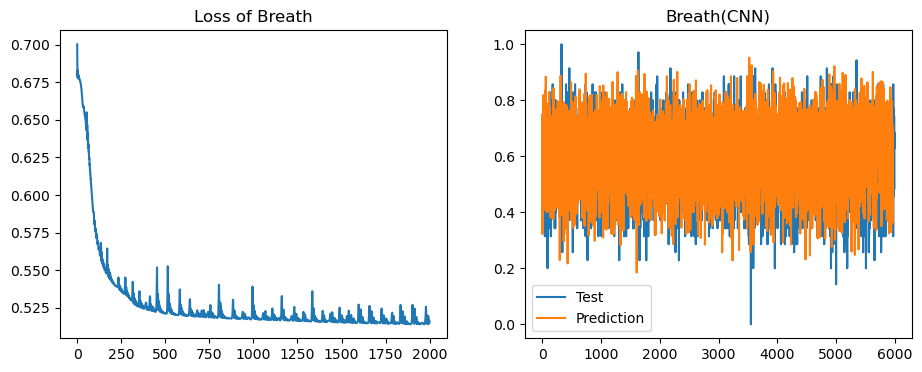

In [23]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.plot(LOSS_br)
plt.title('Loss of Breath')

plt.subplot(1, 2, 2)
plt.plot(t_br)
plt.plot(p_br)
plt.legend(['Test', 'Prediction'])
plt.title('Breath(CNN)')
plt.show()

In [24]:
# 실제값, 예측값, 오차 데이터프레임
scaler = MinMaxScaler()
br_test=pd.DataFrame(bio_test['BR'][window_size:])
br_test['BR']=scaler.fit_transform(br_test['BR'].values.reshape(-1,1))

inv_br_test=scaler.inverse_transform(np.array(t_br).reshape(-1,1))
inv_br_pred=scaler.inverse_transform(p_br)
error_br=pd.DataFrame({'Test': flatten(inv_br_test.tolist()), 'Prediction': flatten(inv_br_pred.tolist()), 'Error': flatten(inv_br_test-inv_br_pred)})
error_br

,Test,Prediction,Error
0,19.0,15.915556,3.084444
1,21.0,23.584694,-2.584694
2,27.0,23.558028,3.441972
3,23.0,11.281437,11.718563
4,16.0,17.544556,-1.544556
...,...,...,...
5958,24.0,20.407837,3.592163
5959,22.0,20.510310,1.489690
5960,24.0,16.791881,7.208119
5961,17.0,16.727365,0.272635


In [25]:
# 응급상황인 데이터
error_br_low=error_br['Error'].mean()-3*error_br['Error'].std()
error_br_upper=error_br['Error'].mean()+3*error_br['Error'].std()
error_br[(error_br['Error']<=error_br_low) | (error_br['Error']>=error_br_upper)]

,Test,Prediction,Error
297,32.0,8.263049,23.736951
298,35.0,8.026960,26.973040
432,27.0,7.606265,19.393735
3520,0.0,27.259525,-27.259525
3561,9.0,32.366831,-23.366831
4255,9.0,30.002155,-21.002155
4969,5.0,32.257259,-27.257259


In [12]:
# 모델 저장 / 불러오기
# torch.save(model_br, 'C:/Users/yong/Desktop/model/model_br.pt')

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 5, 3) # 1*30 -> 5*28
        self.relu1 = nn.ReLU()
        self.max1d1 = nn.MaxPool1d(2, stride =2) # 5*28 -> 5*14
        self.conv2 = nn.Conv1d(5, 10, 3) # 5*14 -> 10*12
        self.relu2 = nn.ReLU()
        self.max1d2 = nn.MaxPool1d(2, stride = 2) # 10*12 -> 10*6
        
        self.fc1 = nn.Linear(60, 30)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 1)     
        
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.max1d1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.max1d2(x)
        x= x.view(-1, 60)
        
        x= self.fc1(x)
        x= self.fc2(x)
        x= self.fc3(x)
       
        return x
# model_br=torch.load('C:/Users/yong/Desktop/model/model_br.pt')

### Heart Rate

In [13]:
hr_train=pd.DataFrame(bio_train['HR'])

scaler = MinMaxScaler()
hr_train['HR']=scaler.fit_transform(hr_train['HR'].values.reshape(-1,1))
hr_train.loc[:, 'return']=make_return(hr_train, 'HR')

window_size=30
scaler = MinMaxScaler()
hr_train['HR']=scaler.fit_transform(hr_train['HR'].values.reshape(-1,1))

window_size=30
X, y = make_data(hr_train, window_size, 'HR')
train_X, train_y = X, y

train_X = torch.FloatTensor(train_X)
train_X = train_X.view(train_X.shape[0], 1, train_X.shape[1])

train_y = torch.FloatTensor(train_y)
train_y = train_y.view(train_y.shape[0],1)

train_cnn = torch.utils.data.TensorDataset(train_X, train_y)
train_loader =torch.utils.data.DataLoader(dataset = train_cnn, batch_size =train_X.shape[0], shuffle = False)

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 5, 3) ## 1*30-> 5*28
        self.relu1 = nn.ReLU()
        self.max1d1 = nn.MaxPool1d(2, stride =2) ## 5*28 -> 5*14
        self.conv2 = nn.Conv1d(5, 10, 3) ## 5*14->10*12
        self.relu2 = nn.ReLU()
        self.max1d2 = nn.MaxPool1d(2, stride = 2) ##10*12->10*6
        
        self.fc1 = nn.Linear(60, 30)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 1)     
        
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.max1d1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.max1d2(x)
        x= x.view(-1, 60)
        
        x= self.fc1(x)
        x= self.fc2(x)
        x= self.fc3(x)
       
        return x

model_hr = CNN()
loss_fn = nn.BCEWithLogitsLoss()
LOSS_hr=[]
optimizer = torch.optim.Adam(model_hr.parameters(), lr=0.01)


for epoch in range(1, 4001):
    for i,(train_, label_) in enumerate(train_loader):        
        optimizer.zero_grad()
        y_pred = model_hr(train_)
        loss = loss_fn(y_pred,label_)
        loss.backward()
        optimizer.step()
        LOSS_hr.append(loss.item())
    if epoch% 500==0:
        print('epoch:', epoch, 'loss:', loss.item())

epoch: 500 loss: 0.48751649260520935
epoch: 1000 loss: 0.48141929507255554
epoch: 1500 loss: 0.4772571921348572
epoch: 2000 loss: 0.4753635823726654
epoch: 2500 loss: 0.47494029998779297
epoch: 3000 loss: 0.47302374243736267
epoch: 3500 loss: 0.48889023065567017
epoch: 4000 loss: 0.47272422909736633


In [15]:
#Test

bio_test=df_bio[df_bio['PD']==1]
bio_test.index=list(range(0, len(bio_test)))
hr_test=pd.DataFrame(bio_test['HR'])

scaler = MinMaxScaler()
hr_test['HR']=scaler.fit_transform(hr_test['HR'].values.reshape(-1,1))
hr_test['return']=make_return(hr_test, 'HR')

window_size=30
hr_test_X, hr_test_y = make_data(hr_test, window_size, 'HR')

hr_test_X = torch.FloatTensor(hr_test_X)
hr_test_X = hr_test_X.view(hr_test_X.shape[0], 1, hr_test_X.shape[1])

hr_test_y = torch.FloatTensor(hr_test_y)
hr_test_y = hr_test_y.view(hr_test_y.shape[0], 1)

t_hr=hr_test[window_size:]['HR']
p_hr=np.array(flatten(torch.sigmoid(model_hr(hr_test_X)).tolist())).reshape(-1,1)

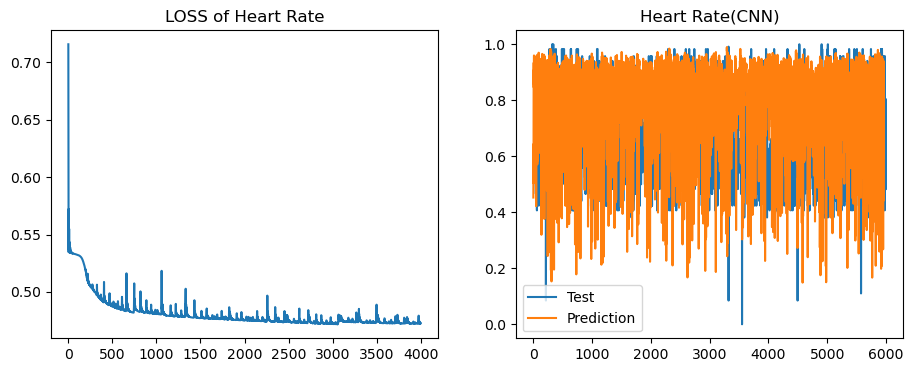

In [16]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.plot(LOSS_hr)
plt.title('LOSS of Heart Rate')

plt.subplot(1, 2, 2)
plt.plot(t_hr)
plt.plot(p_hr)
plt.legend(['Test', 'Prediction'])
plt.title('Heart Rate(CNN)')
plt.show()

In [17]:
# 실제값, 예측값, 오차 데이터프레임
scaler = MinMaxScaler()
hr_test=pd.DataFrame(bio_test['HR'][window_size:])
hr_test['HR']=scaler.fit_transform(hr_test['HR'].values.reshape(-1,1))

inv_hr_test=scaler.inverse_transform(np.array(t_hr).reshape(-1,1))
inv_hr_pred=scaler.inverse_transform(p_hr)
error_hr=pd.DataFrame({'Test': flatten(inv_hr_test.tolist()), 'Prediction': flatten(inv_hr_pred.tolist()), 'Error': flatten(inv_hr_test-inv_hr_pred)})
error_hr

,Test,Prediction,Error
0,112.0,54.410788,57.589212
1,112.0,64.667808,47.332192
2,112.0,76.938602,35.061398
3,67.0,60.409017,6.590983
4,67.0,103.475769,-36.475769
...,...,...,...
5958,58.0,105.471221,-47.471221
5959,58.0,111.896157,-53.896157
5960,96.0,89.773253,6.226747
5961,96.0,80.333473,15.666527


In [18]:
#응급상황인 데이터
error_hr2 = np.log(error_hr['Error']+1-error_hr['Error'].min())*100
error_hr_low=np.exp((error_hr2.mean()-3*error_hr2.std())/100)-1+error_hr['Error'].min()
error_hr_upper=np.exp((error_hr2.mean()+3*error_hr2.std())/100)-1+error_hr['Error'].min()
error_hr[(error_hr['Error']<=error_hr_low) | (error_hr['Error']>=error_hr_upper)]

,Test,Prediction,Error
184,11.0,109.325510,-98.325510
3520,1.0,103.626015,-102.626015
4465,11.0,92.666463,-81.666463
5544,14.0,109.528007,-95.528007


In [19]:
# 모델 저장 / 불러오기
# torch.save(model_hr, 'C:/Users/yong/Desktop/model/model_hr.pt')
# model_hr=torch.load('C:/Users/yong/Desktop/model/model_hr.pt')